# Explorative Analyse

---

In [56]:
import pandas as pd
import numpy as np
import re
import os

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


import seaborn as sns
sns.set()

In [57]:
from scripts.preprocessing import (preprocessing_strompreise,
                                   preprocessing_stromfluss,
                                   preprocessing_stromverbrauch,
                                   feature_exrraction_stromfluss)

%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---

# Daten Import und Preprocessing

In [58]:
dateparse = lambda x: pd.datetime.strptime(x, '%d.%m.%Y')
numberparse = lambda x: pd.np.float(x.replace(".", "").replace(",",".")) if x!="-" else np.nan
convert_thousand = { num:numberparse   for num in np.arange(2,22)}

### Importiere Stromfluss Datensatz

In [59]:
import_files = os.listdir("data/Stromfluss/")

for idx , file in enumerate(import_files):
    print("Import File: {} ".format(file))
    PATH = "data/Stromfluss/" + file
    
    if idx>0:
        df2 = pd.read_csv(PATH,
            sep=r";",
            decimal=r",",
            thousands=r".",
            converters = convert_thousand,
            parse_dates=['Datum'],
            date_parser = dateparse )
        df = df.append(df2)
    else:
        df = pd.read_csv(PATH,
            sep=r";",
            decimal=r",",
            thousands=r".",
            converters = convert_thousand,
            parse_dates=['Datum'],
            date_parser = dateparse)

del df2
df = preprocessing_stromfluss(df)
df = feature_exrraction_stromfluss(df,hour_shift=24)
df.head()

Import File: DE_Physikalischer_Stromfluss_201506010000_201706012359_1.csv 
Import File: DE_Physikalischer_Stromfluss_201706020000_201906022359_1.csv 


,Date,Tag,NX,NL_EX,NL_IM,CHE_EX,CHE_IM,DNK_EX,DNK_IM,CZE_EX,...,AUT_nx_prev_day,CHE_nx_prev_day,CZE_nx_prev_day,DNK_nx_prev_day,FRA_nx_prev_day,LUX_nx_prev_day,NL_nx_prev_day,NX_nx_prev_day,PL_nx_prev_day,SWE_nx_prev_day
0,2015-06-02 00:00:00,2015-06-02,680.0,3068.0,-0.0,0.0,-894.0,17.0,-1107.0,3.0,...,1394.0,145.0,554.0,-272.0,246.0,0.0,3932.0,7279.0,1279.0,1.0
1,2015-06-02 01:00:00,2015-06-02,1420.0,2904.0,-0.0,0.0,-653.0,74.0,-791.0,12.0,...,1355.0,261.0,469.0,-141.0,66.0,0.0,4014.0,7167.0,1142.0,1.0
2,2015-06-02 02:00:00,2015-06-02,2237.0,2940.0,-0.0,0.0,-430.0,75.0,-608.0,104.0,...,1574.0,103.0,422.0,-326.0,-105.0,0.0,3864.0,6667.0,1134.0,1.0
3,2015-06-02 03:00:00,2015-06-02,2818.0,2730.0,-0.0,0.0,-334.0,80.0,-335.0,417.0,...,1271.0,42.0,235.0,-262.0,-206.0,0.0,4242.0,6413.0,1090.0,1.0
4,2015-06-02 04:00:00,2015-06-02,2523.0,2462.0,-0.0,0.0,-420.0,73.0,-370.0,541.0,...,1068.0,-127.0,161.0,-582.0,-549.0,0.0,4292.0,5347.0,1083.0,1.0


### Importiere Strompreise Datensatz

In [6]:
import_files = os.listdir("data/Strompreise/")

for idx , file in enumerate(import_files):
    print("Import File: {} ".format(file))
    PATH = "data/Strompreise/" + file
    if idx>0:
        df2 = pd.read_csv(PATH,
            sep=r";",
            decimal=r",",
            thousands=r".",
            converters = convert_thousand,
            parse_dates=['Datum'],
            date_parser = dateparse )
        df_price = df_price.append(df2)
    else:
        df_price = pd.read_csv(PATH,
            sep=r";",
            decimal=r",",
            thousands=r".",
            converters = convert_thousand,
            parse_dates=['Datum'],
            date_parser = dateparse)
del df2

df_price = preprocessing_strompreise(df_price,hour_shift=24,hour_rolling_window=24)
df_price.head()

Import File: DE_Großhandelspreise_201706010000_201906012359_1.csv 
Import File: DE_Großhandelspreise_201506010000_201706012359_1.csv 


,Date,Tag,price_deutschland/luxemburg,price_dänemark 1,price_dänemark 2,price_frankreich,price_italien (nord),price_niederlande,price_polen,price_schweden 4,price_schweiz,price_slowenien,price_tschechien,price_ungarn,price_österreich,price_deutschland/österreich/luxemburg
47,2015-06-02 23:00:00,2015-06-02,44.390017,20.788750,30.169583,30.997500,49.521667,42.491250,39.270939,30.169583,32.077083,37.734167,32.905833,39.271250,48.781522,31.438333
48,2015-06-03 00:00:00,2015-06-03,44.390017,20.952500,30.333333,31.197500,49.556667,41.933333,39.270939,30.333333,32.282083,38.055833,33.330833,39.699167,48.781522,31.889167
49,2015-06-03 01:00:00,2015-06-03,44.390017,20.976667,30.357500,31.444583,49.545833,42.504167,39.270939,30.357500,32.588333,38.455833,33.660417,40.028750,48.781522,32.202500
50,2015-06-03 02:00:00,2015-06-03,44.390017,20.983333,30.364167,31.693750,49.646250,42.153750,39.270939,30.364167,32.857500,38.857500,33.939583,40.307917,48.781522,32.586250
51,2015-06-03 03:00:00,2015-06-03,44.390017,20.928750,30.309583,31.787083,49.746667,42.247083,39.270939,30.309583,33.085417,39.243333,34.172917,40.541250,48.781522,32.679583


### Importiere Stromverbrauch Datensatz

In [7]:
import_files = os.listdir("data/Stromverbrauch_real/")

for idx , file in enumerate(import_files):
    print("Import File: {} ".format(file))
    PATH = "data/Stromverbrauch_real/" + file
    if idx>0:
        df2 = pd.read_csv(PATH,
            sep=r";",
            decimal=r",",
            thousands=r".",
            converters = convert_thousand,
            parse_dates=['Datum'],
            date_parser = dateparse )
        df_consumption = df_consumption.append(df2)
    else:
        df_consumption = pd.read_csv(PATH,
            sep=r";",
            decimal=r",",
            thousands=r".",
            converters = convert_thousand,
            parse_dates=['Datum'],
            date_parser = dateparse)
del df2

df_consumption = preprocessing_stromverbrauch(df_consumption,1)
df_consumption.head()

Import File: DE_Realisierter Stromverbrauch_201506010000_201706012345_1.csv 
Import File: DE_Realisierter Stromverbrauch_201706010000_201906012345_1.csv 


,shifted_daily_consumption_ger,Tag
Datum,,
2015-06-02,1284069.00,2015-06-02
2015-06-03,1365352.75,2015-06-03
2015-06-04,1339142.50,2015-06-04
2015-06-05,1104016.75,2015-06-05
2015-06-06,1212480.00,2015-06-06


---

In [8]:
export_columns = [col for col in df.columns if col[-2::]=='EX' ]
import_columns = [col for col in df.columns if col[-2::]=='IM' ]

---

### Datensätze zusammenführen

In [9]:
df = pd.merge(df,df_price,on=["Date","Tag"],how="inner").merge(df_consumption,on="Tag")

---

## Import und Export aus verschiedenen Ländern

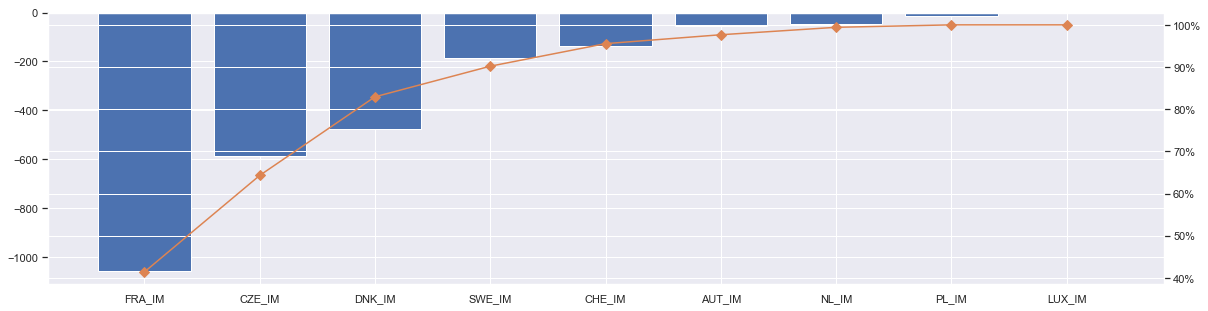

In [10]:
import_data = pd.DataFrame(df[import_columns].mean().sort_values(ascending=True),columns=["mean_import"])
import_data['cum_percentage'] = (import_data.cumsum()/import_data.sum())*100

fig, ax = plt.subplots(figsize=[20,5])
ax.bar(import_data.index,import_data.mean_import)
    
ax2 = ax.twinx()
ax2.plot(import_data.index,import_data.cum_percentage, color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

Wie erwartet. Wir exportieren im Durchschnitt am meisten aus Frankreich, dann Tschechien und Dänemark (80% des gesamten Imports). Daher könnte es hier Sinn machen, sich zu überlegen, welche Einflussgrößen den Import in diese drei Länder beeinflussen? Bspw:
* Strompreise 
* Ausfälle AKWs v.a. Frankreich
* Wetter: 
    - Dänemark hat z.B. fast 40 % Stromkapazität aus erneuerbarer Energie (https://www.laenderdaten.info/Europa/Daenemark/energiehaushalt.php). Dabei sind laut Wikipedia fast 39 % aus Windstrom. Also wären hier Daten zu Wind relativ aufschlussreich. 
    - Tschechien hat 60 % aus fossilen Energieträgern. https://www.laenderdaten.info/Europa/Tschechien/energiehaushalt.php 

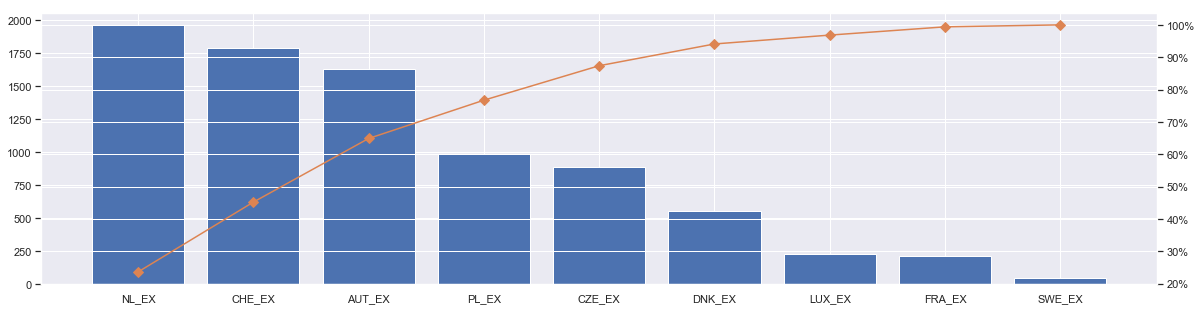

In [11]:
export_data = pd.DataFrame(df[export_columns].mean().sort_values(ascending=False),columns=["mean_import"])
export_data['cum_percentage'] = (export_data.cumsum()/export_data.sum())*100

fig, ax = plt.subplots(figsize=[20,5])
ax.bar(export_data.index,export_data.mean_import)
    
ax2 = ax.twinx()
ax2.plot(export_data.index,export_data.cum_percentage, color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

---

# Korrelationen

## Gesamt

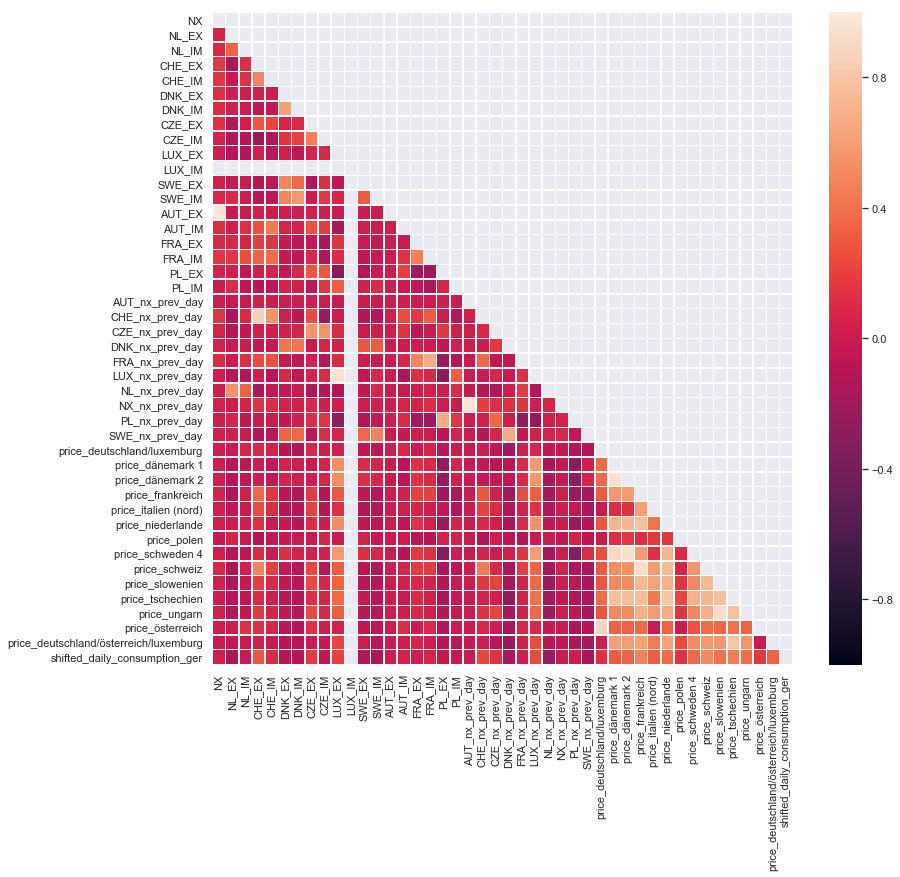

In [12]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(13, 12)
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(df.corr(),mask=mask,vmin=-1,vmax=1,linewidths=.5)

## Nur Preise

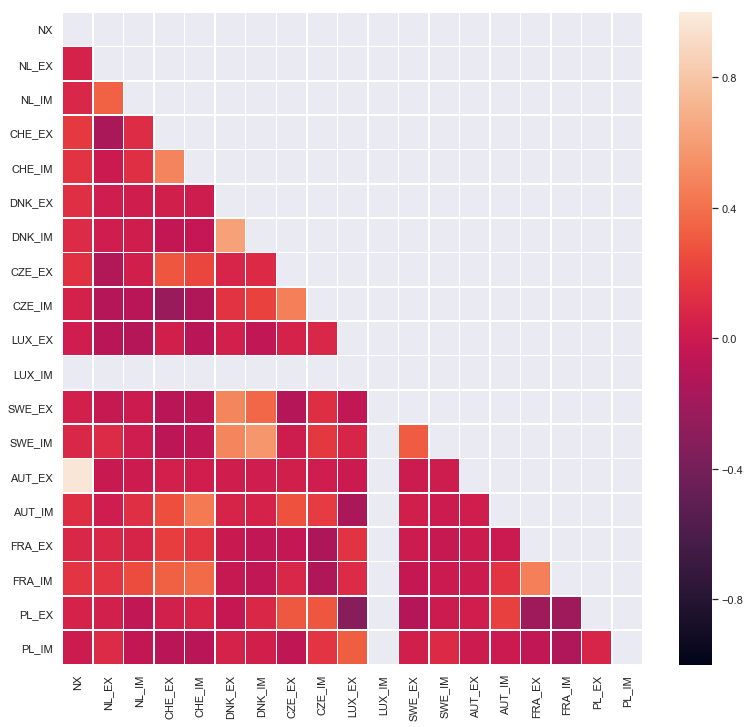

In [52]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(13, 12)
mask = np.zeros_like(df.loc[:,'NX':'PL_IM'].corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(df.loc[:,'NX':'PL_IM'].corr(),mask=mask,vmin=-1,vmax=1,linewidths=.5)

# Auto-Korrelation

## Lag=1

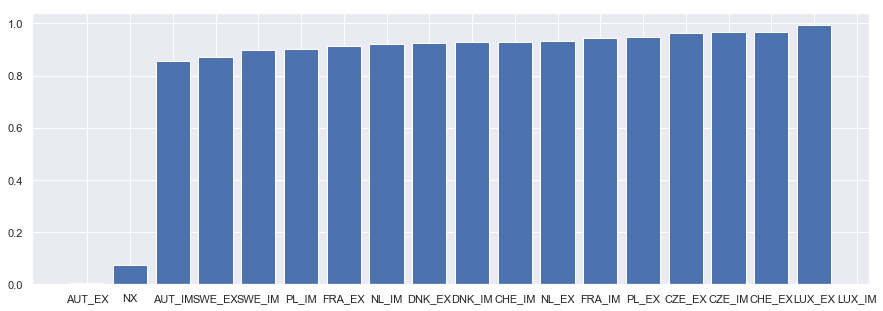

In [50]:
auto_corr = df.loc[:,'NX':'PL_IM'].apply(lambda col: col.autocorr(lag=1) ,axis=0).sort_values()

plt.figure(figsize=[15,5])
plt.bar(auto_corr.index,auto_corr.values)
plt.show()

Hohe abhängigkeit zwischen Zeitpunkten die 1h versetzt sind. 

---

## Lag=24

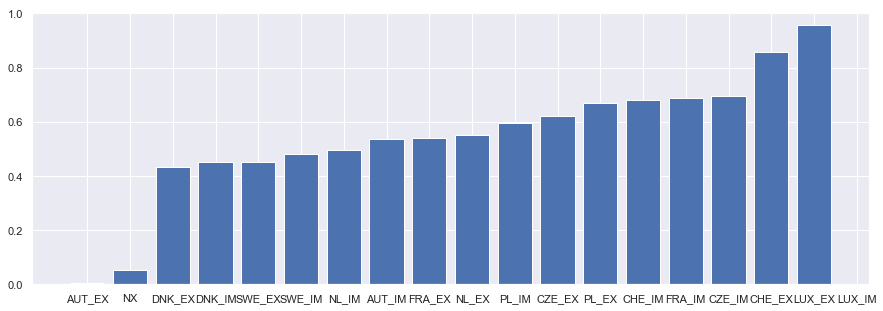

In [51]:
auto_corr = df.loc[:,'NX':'PL_IM'].apply(lambda col: col.autocorr(lag=24) ,axis=0).sort_values()

plt.figure(figsize=[15,5])
plt.bar(auto_corr.index,auto_corr.values)
plt.show()

Immernoch hohe Abhängigkeit für 24h versetzt. 

---

In [54]:
df.columns

Index(['Date', 'Tag', 'NX', 'NL_EX', 'NL_IM', 'CHE_EX', 'CHE_IM', 'DNK_EX',
       'DNK_IM', 'CZE_EX', 'CZE_IM', 'LUX_EX', 'LUX_IM', 'SWE_EX', 'SWE_IM',
       'AUT_EX', 'AUT_IM', 'FRA_EX', 'FRA_IM', 'PL_EX', 'PL_IM',
       'AUT_nx_prev_day', 'CHE_nx_prev_day', 'CZE_nx_prev_day',
       'DNK_nx_prev_day', 'FRA_nx_prev_day', 'LUX_nx_prev_day',
       'NL_nx_prev_day', 'NX_nx_prev_day', 'PL_nx_prev_day', 'SWE_nx_prev_day',
       'price_deutschland/luxemburg', 'price_dänemark 1', 'price_dänemark 2',
       'price_frankreich', 'price_italien (nord)', 'price_niederlande',
       'price_polen', 'price_schweden 4', 'price_schweiz', 'price_slowenien',
       'price_tschechien', 'price_ungarn', 'price_österreich',
       'price_deutschland/österreich/luxemburg',
       'shifted_daily_consumption_ger'],
      dtype='object')

In [60]:
col = ['Date', 'Tag', 'NX', 'NL_EX', 'NL_IM', 'CHE_EX', 'CHE_IM', 'DNK_EX',
       'DNK_IM', 'CZE_EX', 'CZE_IM', 'LUX_EX', 'LUX_IM', 'SWE_EX', 'SWE_IM',
       'AUT_EX', 'AUT_IM', 'FRA_EX', 'FRA_IM', 'PL_EX', 'PL_IM']

df[col].to_csv('data/stromfluesse.csv',sep=";")